# load the data and import the packages 

In [196]:
#import the packages
import pandas as pd 
import numpy as np
from datetime import datetime
from statsmodels.formula.api import ols 
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [176]:

data = pd.read_excel(r'C:\Users\amin\Downloads\Flights_raw.xlsx')


In [177]:
#convert the date column to datetime column for implementig the aggregation
for i in range(len(df['date'])):
    data['date'].iloc[i]=datetime.strptime(data['date'].iloc[i], '%Y-%m-%d')


C:\Users\amin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [178]:
l=df['total_cases']
n=df['Group']
# create a new data frame for aggregation 
data1 = pd.DataFrame({'total_cases':l},index=pd.date_range('2019-06-13', periods=433))
for i in range(433):
    data1['total_cases'].iloc[i]=l[i]
c=0
for i in range(len(data1['total_cases'])):
    if data1['total_cases'].iloc[i]!=0:
        c+=1    



In [179]:
#aggregation by summing up cases within each month
data2 = data1.groupby(pd.Grouper(freq='M')).sum()
#get the last 12 lines 
data2 = data2.head(12)


In [180]:

data3 = pd.read_excel(r"C:\Users\amin\Downloads\Arrivals.xlsx")
#take the 12 last lines
data3= data3.tail(12)



 



In [181]:
#adding the column which contains the summ of the number of arrivals from each country by month (region)
l=[]
for i in range(len(data3[data3.columns[1]])):
    l.append(data3[data3.columns[1]].iloc[i])
data4 = pd.DataFrame(l)
data4.index = data2.index


In [182]:
#adding the Group column 
c=[]
for i in range(len(data2['total_cases'])):
    if data2['total_cases'].iloc[i]==0:
        c.append(0)
    else : 
        c.append(1)
data2['Group']=c


# Data Visualisation

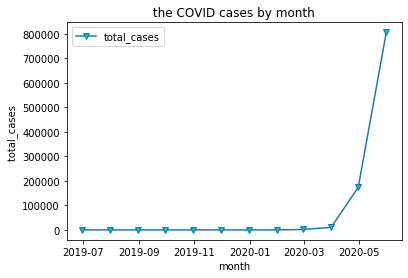

In [195]:
#plot the linechart of the COVID cases by month
plt.plot(data2.index,data2['total_cases'],marker='v', markerfacecolor='c',label="total_cases")

plt.title(' the COVID cases by month ')
plt.xlabel('month')
plt.ylabel('total_cases ')
plt.legend()

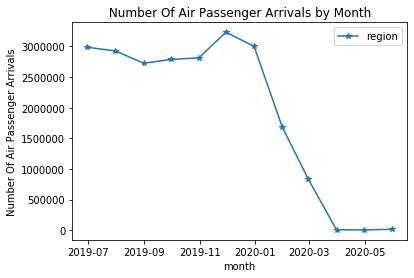

In [194]:

plt.plot(data4.index,data4[0],marker='*',label="region")
plt.title(' Number Of Air Passenger Arrivals by Month ')
plt.xlabel('month')
plt.ylabel('Number Of Air Passenger Arrivals')
plt.legend()

In [185]:
data2['Arrivals']=data4
for i in range(len(l)):
    data2['Arrivals'].iloc[i]=l[i]
  


C:\Users\amin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,total_cases,Group,Arrivals
2019-06-30,0.0,0,2986187
2019-07-31,0.0,0,2926617
2019-08-31,0.0,0,2726048
2019-09-30,0.0,0,2787094
2019-10-31,0.0,0,2814414
2019-11-30,0.0,0,3231750
2019-12-31,0.0,0,3000922
2020-01-31,49.0,1,1687083
2020-02-29,1741.0,1,828317
2020-03-31,10295.0,1,5776


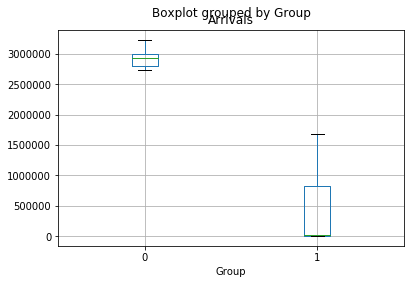

In [186]:
#plot the boxplot of  the summ of the number of arrivals from each country by month
data2.boxplot('Arrivals',by='Group')

In [187]:
#function that calculates the mean of any list given 
def function(l):
    c=0
    mean = 0
    n=len(l)
    for i in range(n):
        c+=l[i]
    mean = c/n
    return mean
        

In [188]:
Mo = data2.head(7)
MA = data2.tail(5)

In [189]:
#create a data frame which contains the mean of each variables to plot the barchart
#calculate the mean of region 
a =function(Mo['Arrivals'])
#calculate the mean of Group
b=function(MA['Arrivals'])



In [190]:
#create a data frame which contains the mean of each column
plotdata = {'mean_region_for-group_0':[a] ,
        'mean_region_for-group_1': [b] }

plotdata = pd.DataFrame (plotdata, columns = ['mean_region_for-group_0','mean_region_for-group_1'])

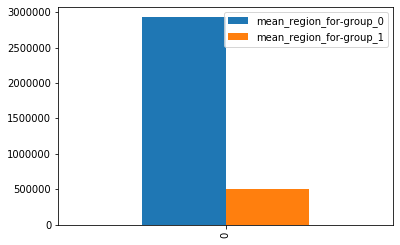

In [191]:
#the barchart that shows the mean Arrivals according to each group
plotdata.plot.bar()

# Data Analytics

In [192]:
# do the anova test
mod = ols('Arrivals~Group',data=data2).fit()
aov_table = sm.stats.anova_lm(mod,type=2)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Group,1.0,1.703728e+13,1.703728e+13,70.472361,0.000008
Residual,10.0,2.417583e+12,2.417583e+11,NaN,NaN
